In [2]:
conda install opencv

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\123sh\anaconda3\envs\tensorflow-gpu

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.07  |           py36_0           6 KB
    anaconda-custom            |           py36_1           3 KB
    icu-64.2                   |       he025d50_1        14.1 MB  conda-forge
    jpeg-9d                    |       he774522_0         344 KB  conda-forge
    libblas-3.8.0              |           14_mkl         3.5 MB  conda-forge
    libcblas-3.8.0             |           14_mkl         3.5 MB  conda-forge
    libclang-9.0.1             |default_hf44288c_0        16.7 MB
    liblapack-3.8.0            |           14_mkl         3.5 MB  conda-forge
    liblapacke-3.8.0           |           14_mkl         3.5 MB  conda-forge
    libopencv-4.4.0  

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.densenet import DenseNet169,DenseNet201
from keras.applications.nasnet import NASNetLarge

In [2]:
import numpy as np 
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras import layers
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras import optimizers
from keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet169,DenseNet201
from keras.applications.nasnet import NASNetLarge
from keras.layers import Input
from sklearn.model_selection import train_test_split
import cv2



import os
print(os.listdir("C:\\Users\\123sh\\Documents\\BreakHist_Dataset"))

['100X', '200X', '400X', '40X']


In [3]:
afiles = os.listdir("C:\\Users\\123sh\\Documents\\BreakHist_Dataset")

In [4]:
Bimgs, Mimgs=[],[]
for file in [afiles[0]]:
    pics= [os.path.join(root,name) for root,dirs,files in os.walk("C:\\Users\\123sh\\Documents\\BreakHist_Dataset\\{}\\Benign".format(file)) for name in files]
    Bimgs.extend(pics)
    pics = [os.path.join(root,name) for root,dirs,files in os.walk("C:\\Users\\123sh\\Documents\\BreakHist_Dataset\\{}\\Malignant".format(file)) for name in files]
    Mimgs.extend(pics)
    del pics

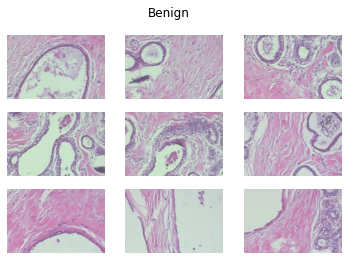

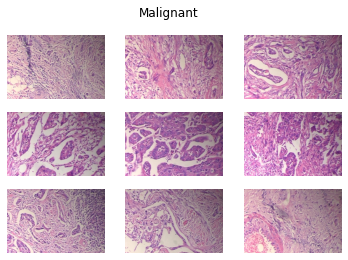

In [5]:
fig,ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        img = plt.imread(Bimgs[j + 3*i])
        ax[i,j].imshow(img)
        ax[i,j].axis('off')
fig.suptitle('Benign')
###
fig,ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        img = plt.imread(Mimgs[j+3*i])
        ax[i,j].imshow(img)
        ax[i,j].axis('off')
fig.suptitle('Malignant')
plt.show()

In [6]:
shape = cv2.imread(Bimgs[0]).shape

size = (200,200)
B_X=[]
for x in Bimgs: 
    im = cv2.imread(x)
    im = cv2.resize(im,size,interpolation=cv2.INTER_AREA)
    B_X.append(im)
    del im

M_X=[]
for x in Mimgs: 
    im = cv2.imread(x)
    im = cv2.resize(im,size,interpolation=cv2.INTER_AREA)
    M_X.append(im)
    del im

B_Y = [0 for x in range(len(Bimgs))]
M_Y = [1 for x in range(len(Mimgs))]
X = np.array(B_X+M_X)
Y = np.array(B_Y+M_Y)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(X), np.array(Y), test_size=0.2, random_state=43)

In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0, 
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=True)  


In [9]:
batch_size = 32
num_classes = 2
epochs = 100
input_shape = X[0].shape
e = 2

In [10]:
MODEL={'ResNet50':ResNet50, \
      'NASNetLarge':NASNetLarge, \
      'DenseNet169':DenseNet169,'DenseNet201':DenseNet201}

In [11]:
name = 'ResNet50'
model = MODEL[name](input_shape=input_shape,weights=None,include_top=True,classes=num_classes)
model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [12]:


from keras.utils.np_utils import to_categorical
y_trainCat=to_categorical(Y_train,num_classes=num_classes)
y_testCat=to_categorical(Y_test,num_classes=num_classes)
y_all=to_categorical(Y,num_classes=num_classes)



In [13]:
# import keras
adam = Adam(lr=0.0001)
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=adam,metrics=['accuracy'])
# history = model.fit(X, y_all, epochs=epochs,validation_split=0.2)
if os.path.exists('breakhis_{}.h5'.format(name)):
    model.load_weights('breakhis_{}.h5'.format(name))
history = model.fit(datagen.flow(X_train,y_trainCat, batch_size=batch_size),
                              steps_per_epoch=len(X_train) / 32, 
                              epochs=epochs,validation_data = [X_test, y_testCat])

Epoch 1/100
51/50 [==============================] - 25s 481ms/step - loss: 0.6832 - accuracy: 0.7592 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
51/50 [==============================] - 22s 427ms/step - loss: 0.4474 - accuracy: 0.8023 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
51/50 [==============================] - 22s 435ms/step - loss: 0.4164 - accuracy: 0.8202 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
51/50 [==============================] - 22s 433ms/step - loss: 0.3859 - accuracy: 0.8313 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
51/50 [==============================] - 22s 434ms/step - loss: 0.3854 - accuracy: 0.8227 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
51/50 [==============================] - 22s 433ms/step - loss: 0.3822 - accuracy: 0.8356 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
51/50 [==============================] - 22s 429ms/step - loss: 0.3728 - acc

In [16]:
conda list cudnn

# packages in environment at C:\Users\123sh\anaconda3\envs\tensorflow-gpu:
Note: you may need to restart the kernel to use updated packages.

#
# Name                    Version                   Build  Channel


In [ ]:
pip uninstall tensorflow-gpu

In [18]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

RuntimeError: Physical devices cannot be modified after being initialized

In [21]:
tf.config.gpu.set_per_process_memory_fraction(0.75)
tf.config.gpu.set_per_process_memory_growth(True)

AttributeError: module 'tensorflow._api.v2.config' has no attribute 'gpu'

In [22]:
import keras
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'